# IEOR 174 Discussion 3

**Table of contents**<a id='toc0_'></a>    
1. [Absolute error measure](#toc1_) 
2. [MLE Estimation](#toc2_)   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# <a id='toc1_'></a>[Absolute error measure](#toc0_)


Let $X_1, X_2, \ldots, X_n$ be a sequence of **independent and identically distributed (i.i.d.)** random variables.

We assume they are drawn from a distribution with a defined expected value $\mathbb{E}[X_i] = \mu$ and a \textbf{finite} variance $\text{Var}(X_i) = \sigma^2 < \infty$.


Let $\bar{X}_n = \frac{1}{n}\sum_{i=1}^{n} X_i$ be the sample mean. The standardized version of the sample mean is:

$$ Z_n = \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} = \frac{\sum_{i=1}^{n} X_i - n\mu}{\sigma\sqrt{n}} $$

As $n \to \infty$, the random variable $Z_n$ weakly converge (converge in distribution) to a standard normal random variable $Z \sim N(0, 1)$. This is formally written as:

$$ Z_n \xrightarrow{d} N(0, 1) \quad \text{as} \quad n \to \infty $$

In essence, for a sufficiently large sample size $n$, the distribution of the sample mean $\bar{X}_n$ is approximately normal with mean $\mu$ and variance $\sigma^2/n$, regardless of the shape of the original distribution of the $X_i$.


## Using the CLT to Estimate Sample Size

In multiple-round simulations, usually our goal is to estimate a population mean $\mu$ using the sample mean $\bar{x}_n$. We want to determine the minimum sample size, $n$, required to ensure our estimate is accurate within a tolerance $\epsilon$ with a high level of confidence.

Formally, we want to find an $n$ such that the probability of the estimation error exceeding $\epsilon$ is less than or equal to a small value $\alpha$ (the significance level).
$$\mathbb{P}(|\bar{x}_n - \mu| > \epsilon) \le \alpha$$
The confidence level is then $1-\alpha$.

---

### Finding the Error Probability with CLT

To solve for $n$, we need an expression for the error probability. The Central Limit Theorem provides an excellent approximation for large $n$.

Let's manipulate the term inside the probability to standardize it:
$$\mathbb{P}(|\bar{x}_n - \mu| > \epsilon) = \mathbb{P}\left( \frac{|\bar{x}_n - \mu|}{\sigma/\sqrt{n}} > \frac{\epsilon}{\sigma/\sqrt{n}} \right)$$
By the CLT, the term on the left, $Z_n = \frac{\bar{x}_n - \mu}{\sigma/\sqrt{n}}$, is approximately distributed as a standard normal variable, $Z \sim N(0,1)$. Therefore, we can approximate the probability:
$$\mathbb{P}(|\bar{x}_n - \mu| > \epsilon) \approx \mathbb{P}\left( |Z| > \frac{\epsilon\sqrt{n}}{\sigma} \right)$$
Now we have an explicit relationship between the error probability, $n$, $\epsilon$, and $\sigma$.

To achieve a confidence level of **99.7%**, we require the error probability $\alpha$ to be $1 - 0.997 = 0.003$. From the properties of the standard normal distribution, we know that $\mathbb{P}(|Z| > 3) \approx 0.003$.



By setting our desired error probability, we get the inequality:
$$\frac{\epsilon\sqrt{n}}{\sigma} \ge 3$$
Solving for $n$, we find the required sample size:
$$n \ge \left(\frac{3\sigma}{\epsilon}\right)^2 = \frac{9\sigma^2}{\epsilon^2}$$

---

### When Can We Do This?

The validity of this CLT-based approximation depends on how closely the distribution of the sample mean follows a normal distribution. A common **rule of thumb** is that the sample size $n$ should be **at least 30**.

However, this is just a guideline. If the underlying population distribution is heavily skewed or has significant outliers, a much larger sample size may be necessary for the approximation to be accurate.

---

### An Intuitive Way to Calculate

A quick way to frame this problem is to relate the desired **margin of error ($\epsilon$)** to the **standard error of the mean ($\sigma/\sqrt{n}$)**. The confidence level tells you how many standard errors you need to "stretch" to capture the desired probability.

The relationship is:
**Margin of Error = (Critical Value) × (Standard Error of the Mean)**
$$\epsilon = z \cdot \left(\frac{\sigma}{\sqrt{n}}\right)$$
Based on the 68-95-99.7 rule:
* For **68%** confidence, $z \approx 1$, so we solve $\epsilon = 1 \cdot \frac{\sigma}{\sqrt{n}}$.
* For **95%** confidence, $z \approx 2$, so we solve $\epsilon = 2 \cdot \frac{\sigma}{\sqrt{n}}$.
* For **99.7%** confidence, $z \approx 3$, so we solve $\epsilon = 3 \cdot \frac{\sigma}{\sqrt{n}}$.

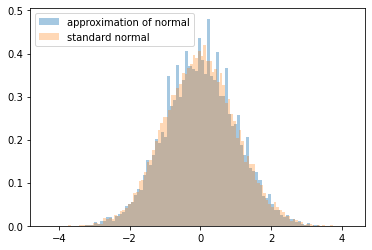

In [ ]:
n_exper = 1000
mean = 3
std = 1

chi_record = np.zeros(20000)
for i in range(20000):
    # record errors here
    
    # case 1. exponential
    #x = mean - std + np.random.exponential(std, size=n_exper)
    
    # case 2. uniform
    #x = mean-0.5*std*12**0.5+12**0.5*std*np.random.rand(n_exper)
    
    # case 3. binominal
    prob = 0.5
    num = 10
    x = np.random.binomial(num, prob, size=n_exper)
    mean = num*prob
    std = (num*prob*(1-prob))**0.5
    
    
    chi_n = (np.mean(x) - mean)*n_exper**0.5/(std)
    chi_record[i] = chi_n
    
_ = plt.hist(chi_record, bins=100, density=True,label='approximation of normal',alpha=0.4)
_ = plt.hist(np.random.normal(size=20000),bins=100,density=True, alpha=0.3,label='standard normal')
#plt.xlabel('distribution of error if we do {} times experiments'.format(n_exper))
plt.legend()

# <a id='toc2_'></a>[2. MLE Estimation](#toc0_) 

Maximum Likelihood Estimation (MLE) is a method for estimating the parameters of a statistical model. The core idea is simple: find the parameter values that make the observed data **most probable** or **most likely**.

### The General Recipe for MLE

The process generally follows these four steps:

1.  **Write the Likelihood Function ($\mathcal{L}$):** For a set of $n$ independent data points $x_1, x_2, ..., x_n$, the likelihood is the product of the probability density function (PDF) evaluated at each point.
    $$\mathcal{L}(\text{parameters} | \mathbf{x}) = \prod_{i=1}^{n} f(x_i; \text{parameters})$$
2.  **Find the Log-Likelihood ($\ln \mathcal{L}$):** Products are hard to work with, so we take the natural logarithm. This turns the product into a sum, which is much easier to differentiate. Maximizing the log-likelihood is the same as maximizing the likelihood.
    $$\ln \mathcal{L} = \sum_{i=1}^{n} \ln f(x_i; \text{parameters})$$
3.  **Differentiate the Log-Likelihood:** Take the partial derivative of the log-likelihood with respect to each parameter you want to estimate.
4.  **Solve for the Parameters:** Set the derivatives equal to zero and solve the resulting system of equations. The solutions are the Maximum Likelihood Estimates (MLEs), often denoted with a "hat" (e.g., $\hat{\theta}$). In many cases, this requires a computer to solve numerically.

---

### 1. Log-Normal Distribution

The log-normal distribution is one of the most straightforward examples because it has a clean, analytical solution.

* **Use Case:** Models random variables that are the product of many small, independent factors. It's used for data that is positive and right-skewed, such as income levels, stock prices, or biological measurements. A variable $X$ is log-normally distributed if $\ln(X)$ is normally distributed.
* **Parameters:** $\mu$ (mean of the log data) and $\sigma^2$ (variance of the log data).
* **PDF:** $f(x; \mu, \sigma) = \frac{1}{x\sigma\sqrt{2\pi}} \exp\left(-\frac{(\ln(x) - \mu)^2}{2\sigma^2}\right)$

#### MLE Fitting Steps:

The key insight is that if the data $x_1, ..., x_n$ comes from a log-normal distribution, then the log-transformed data $y_i = \ln(x_i)$ comes from a normal distribution with parameters $\mu$ and $\sigma^2$.

Therefore, the MLEs for the log-normal parameters are simply the **sample mean and sample variance of the log-transformed data**.

1.  Transform your data: Create a new dataset $y_i = \ln(x_i)$ for all your data points.
2.  Calculate the sample mean of the $y_i$:
    $$\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} \ln(x_i)$$
3.  Calculate the sample variance of the $y_i$:
    $$\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (\ln(x_i) - \hat{\mu})^2$$
*(Note: This is the MLE for variance, which divides by $n$. The unbiased sample variance divides by $n-1$, but for MLE, we use $n$.)*

---

### 2. Pareto Distribution

* **Use Case:** Models phenomena where a large portion of the "effect" comes from a small portion of the "causes" (the "80/20 rule"). Common in economics (wealth distribution), sociology (city populations), and insurance.
* **Parameters:** $x_m$ (scale, the minimum possible value) and $\alpha$ (shape).
* **PDF:** $f(x; x_m, \alpha) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}}$ for $x \ge x_m$.

#### MLE Fitting Steps:

This distribution also has a clean, analytical solution.

1.  **Estimate $x_m$:** The likelihood function is maximized when $x_m$ is as large as possible. But by definition, $x_m$ cannot be larger than any data point. Therefore, the MLE for $x_m$ is simply the **minimum value in your dataset**.
    $$\hat{x}_m = \min(x_1, x_2, ..., x_n)$$
2.  **Estimate $\alpha$:** After finding $\hat{x}_m$, we can use the derivative method to find $\alpha$. The log-likelihood is:
    $$\ln \mathcal{L}(\alpha, x_m | \mathbf{x}) = n \ln(\alpha) + n\alpha \ln(x_m) - (\alpha+1)\sum_{i=1}^{n} \ln(x_i)$$
    Taking the derivative with respect to $\alpha$, setting to zero, and substituting $\hat{x}_m$ gives the MLE for $\alpha$:
    $$\hat{\alpha} = \frac{n}{\sum_{i=1}^{n} \ln(x_i) - n \ln(\hat{x}_m)} = \frac{n}{\sum_{i=1}^{n} \ln(x_i / \hat{x}_m)}$$

---

### 3. Weibull Distribution

* **Use Case:** Extremely flexible distribution used extensively in reliability engineering to model time-to-failure, in weather forecasting for wind speeds, and in survival analysis. ⚙️
* **Parameters:** $k$ (shape) and $\lambda$ (scale).
* **PDF:** $f(x; k, \lambda) = \frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-(x/\lambda)^k}$

#### MLE Fitting Steps:

The Weibull distribution is a case where we don't have a simple, closed-form solution for both parameters simultaneously. It requires numerical methods.

1.  **Log-Likelihood Function:**
    $$\ln \mathcal{L}(k, \lambda | \mathbf{x}) = n \ln(k) - nk \ln(\lambda) + (k-1) \sum_{i=1}^{n} \ln(x_i) - \sum_{i=1}^{n} \left(\frac{x_i}{\lambda}\right)^k$$
2.  **Differentiate and Solve:** Taking the partial derivatives with respect to $\lambda$ and $k$ and setting them to zero gives a system of two equations.
    * From the derivative with respect to $\lambda$, we can isolate $\lambda$:
        $$\hat{\lambda} = \left( \frac{1}{n} \sum_{i=1}^{n} x_i^k \right)^{1/k}$$
    * The derivative with respect to $k$ does not yield a clean solution.
3.  **Numerical Solution:** The standard approach is:
    * Substitute the expression for $\hat{\lambda}$ into the second equation (the derivative with respect to $k$).
    * This leaves you with one complex equation that only contains the unknown parameter $k$.
    * Solve this equation for $k$ using a numerical root-finding algorithm (like Newton-Raphson). This is almost always done with statistical software.
    * Once you have the numerical estimate $\hat{k}$, plug it back into the equation for $\hat{\lambda}$ to find the scale parameter.

---

### 4. Beta Distribution

* **Use Case:** The premier distribution for modeling random variables that are bounded between 0 and 1, such as proportions, percentages, or probabilities.
* **Parameters:** $\alpha$ (shape 1) and $\beta$ (shape 2).
* **PDF:** $f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$, where $B(\alpha, \beta)$ is the Beta function.



#### MLE Fitting Steps:

Like the Weibull distribution, the Beta distribution requires numerical optimization to find the MLEs for $\alpha$ and $\beta$.

1.  **Log-Likelihood Function:**
    $$\ln \mathcal{L}(\alpha, \beta | \mathbf{x}) = (\alpha-1)\sum_{i=1}^{n} \ln(x_i) + (\beta-1)\sum_{i=1}^{n} \ln(1-x_i) - n \ln B(\alpha, \beta)$$
2.  **Differentiate:** Taking the partial derivatives with respect to $\alpha$ and $\beta$ results in equations that involve the **digamma function**, $\psi(\cdot)$, which is the derivative of the log-gamma function.
    $$\frac{\partial \ln \mathcal{L}}{\partial \alpha} = \sum \ln(x_i) - n[\psi(\alpha) - \psi(\alpha+\beta)] = 0$$
    $$\frac{\partial \ln \mathcal{L}}{\partial \beta} = \sum \ln(1-x_i) - n[\psi(\beta) - \psi(\alpha+\beta)] = 0$$
3.  **Numerical Solution:** This system of two equations involving the digamma function has no analytical solution. You must use a numerical optimization algorithm (e.g., gradient descent, Newton's method) to find the values of $\hat{\alpha}$ and $\hat{\beta}$ that simultaneously solve these equations. This is standard practice and is implemented in all major statistical software packages (like Python's `scipy.stats.beta.fit` or R's `fitdistrplus` package).

Original True Parameters:
  alpha = 2.000
  beta  = 5.000

MLE Estimated Parameters:
  alpha = 2.040
  beta  = 4.939


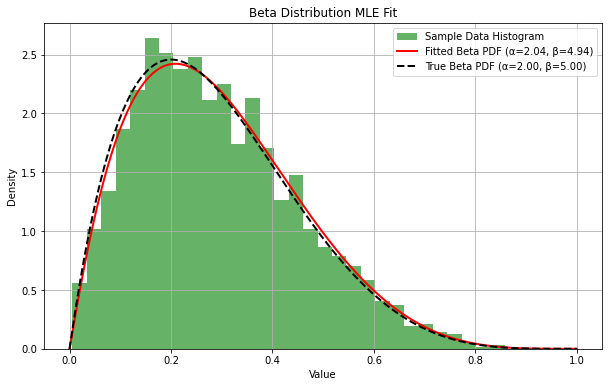

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# --- 1. Generate Synthetic Data ---
# We create data from a known Beta distribution to check if our fit is accurate.
# Let's use true parameters alpha=2 and beta=5.
true_alpha = 2.0
true_beta = 5.0
sample_size = 2000

# Generate random variates from the beta distribution
data = stats.beta.rvs(a=true_alpha, b=true_beta, size=sample_size)

# --- 2. Fit the Beta Distribution using MLE ---
# The .fit() method finds the parameters (a, b) that maximize the likelihood of the data.
# We use floc=0 and fscale=1 to fix the location and scale to the standard [0, 1] interval.
est_alpha, est_beta, loc, scale = stats.beta.fit(data, floc=0, fscale=1)

print(f"Original True Parameters:")
print(f"  alpha = {true_alpha:.3f}")
print(f"  beta  = {true_beta:.3f}\n")

print(f"MLE Estimated Parameters:")
print(f"  alpha = {est_alpha:.3f}")
print(f"  beta  = {est_beta:.3f}")


# --- 3. Visualize the Results ---
# Plot a histogram of the data and overlay the PDF of the fitted distribution.
plt.figure(figsize=(10, 6))

# Plot the histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Sample Data Histogram')

# Create a range of x-values for the PDF plot
x_range = np.linspace(0, 1, 1000)

# Plot the PDF of the fitted beta distribution
fitted_pdf = stats.beta.pdf(x_range, a=est_alpha, b=est_beta)
plt.plot(x_range, fitted_pdf, 'r-', lw=2, label=f'Fitted Beta PDF (α={est_alpha:.2f}, β={est_beta:.2f})')

# Plot the PDF of the true distribution for comparison
true_pdf = stats.beta.pdf(x_range, a=true_alpha, b=true_beta)
plt.plot(x_range, true_pdf, 'k--', lw=2, label=f'True Beta PDF (α={true_alpha:.2f}, β={true_beta:.2f})')


plt.title('Beta Distribution MLE Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

MLE Estimated Beta Parameters:
  alpha (α) = 5.363
  beta (β)  = 3.576


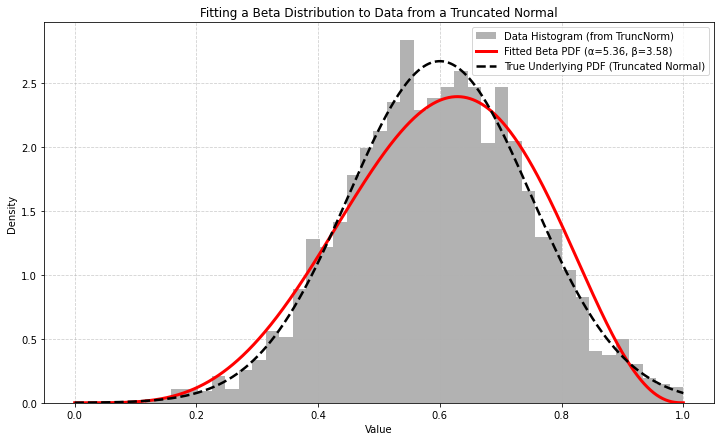

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# --- 1. Generate Data from an Underlying "True" Distribution ---
# We'll use a truncated normal distribution as our ground truth.
# This distribution is defined on [0, 1] but is NOT a Beta distribution.
mu, sigma = 0.6, 0.15  # Mean and standard deviation of the underlying normal
lower_bound, upper_bound = 0, 1
sample_size = 3000

# Create the truncated normal distribution object
# The a and b parameters are in terms of standard deviations from the mean
a = (lower_bound - mu) / sigma
b = (upper_bound - mu) / sigma
true_dist = stats.truncnorm(a=a, b=b, loc=mu, scale=sigma)

# Generate the data
data = true_dist.rvs(sample_size)

# --- 2. Fit a Beta Distribution to this Data ---
# We pretend we don't know the data's origin and try to model it with a Beta distribution.
est_alpha, est_beta, loc, scale = stats.beta.fit(data, floc=0, fscale=1)

print("MLE Estimated Beta Parameters:")
print(f"  alpha (α) = {est_alpha:.3f}")
print(f"  beta (β)  = {est_beta:.3f}")

# --- 3. Visualize and Compare the Distributions ---
plt.figure(figsize=(12, 7))

# Plot the histogram of the generated data
plt.hist(data, bins=40, density=True, alpha=0.6, color='gray', label='Data Histogram (from TruncNorm)')

# Create an x-axis for plotting the PDFs
x_range = np.linspace(0, 1, 1000)

# Plot the PDF of the FITTED Beta distribution
fitted_pdf = stats.beta.pdf(x_range, a=est_alpha, b=est_beta)
plt.plot(x_range, fitted_pdf, 'r-', lw=3, label=f'Fitted Beta PDF (α={est_alpha:.2f}, β={est_beta:.2f})')

# Plot the PDF of the TRUE underlying distribution for comparison
true_pdf = true_dist.pdf(x_range)
plt.plot(x_range, true_pdf, 'k--', lw=2.5, label=f'True Underlying PDF (Truncated Normal)')

plt.title('Fitting a Beta Distribution to Data from a Truncated Normal')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()